Click the button above to load the interactive widgets

In [1]:
import pandas as pd
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
# from sklearn.metrics import mean_squared_error
# from scipy.optimize import curve_fit, fsolve

from IPython.display import Image
from ipywidgets import interact
from ipywidgets import fixed, SelectMultiple, Layout

from pandas.tseries.offsets import Week
%matplotlib inline

<b> Preface </b>
    
    Here are being condensed few simple models and data visualization tools that capture my attention in literature. The idea is to play around with it and understand how important is to limit social contact in this period, and also the importance of modelling for understanding and timely actions.

# Load data from JHU

In [2]:
def loadData(fileName):
    data = pd.read_csv(baseURL + fileName) \
             .drop(['Lat', 'Long'], axis=1) #\
#              .melt(id_vars=['Province/State', 'Country/Region'], 
#                  var_name='date', value_name=columnName) \
#              .astype({'date':'datetime64[ns]', columnName:'Int64'}, 
#                  errors='ignore')
    data['Province/State'].fillna('<all>', inplace=True)
#     data[columnName].fillna(0, inplace=True)
    return data

In [3]:
baseURL = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/"

In [4]:
Confirmed = loadData("time_series_covid19_confirmed_global.csv")

# Structure dataset

In [5]:
# grouping by country
Confirmed = Confirmed.groupby(['Country/Region']).sum()

In [6]:
Confirmed = Confirmed.T

In [7]:
Confirmed.index = pd.to_datetime(Confirmed.index)

# LogLog visualization (when are we on our way out of pandemic)

Inspired by https://t.co/q2AtUQBX5P?amp=1

In [8]:
Confirmedweeklyrates = (Confirmed - Confirmed.shift(1, freq=Week()).reindex(Confirmed.index)).fillna(value=0)

In [9]:
def plot_infectionrate(Confirmedweeklyrates, country, return_plot = True, return_df=False):
    """
    Confirmedweeklyrates: rate of infection adjusted from JHU
    country: string
    """
    country = list(country)
    res = Confirmedweeklyrates[country]
    if return_plot is True:
        res.plot()
    if return_df is True:
        return(res);

## Visualization of infection rate (weekly new cases)

Check the rate of infections for one or multiple countries

In [10]:
interact(plot_infectionrate,
         Confirmedweeklyrates = fixed(Confirmedweeklyrates),
         country = SelectMultiple(options=list(Confirmedweeklyrates.columns), value=['Belgium', 'Italy', 'Spain', 'US'],
                                  description='Select country(ies)',
                                  style = {'description_width': 'initial'},
                                  layout=Layout(width='40%', height='100px')),
         return_df = fixed(False),
         return_plot = fixed(True));

interactive(children=(SelectMultiple(description='Select country(ies)', index=(16, 84, 154, 169), layout=Layou…

## loglog plot

Inspired by https://t.co/q2AtUQBX5P?amp=1

A smart way of visualizing how effective are the measures taken from each country to limit the infection rate. When the Y axis values drop significantly, this means that the spreading of the infections is sensibly decreased.

In [11]:
Confirmedweeklyrates = (Confirmed - Confirmed.shift(1, freq=Week()).reindex(Confirmed.index)).fillna(value=0)

In [12]:
def loglog_covid2(Confirmedweeklyrates, countries):
    """
    Confirmed: df adjustedc from JHU
    countries: list in columns of Confirmed
    
    """
    fig, axes = plt.subplots(figsize=(15,8))
    

    axes.loglog(Confirmed.sum(axis=1), Confirmedweeklyrates[countries].values, 'o')
    axes.legend(countries)
    axes.set_title('Loglog')
    axes.set_ylabel('Weekly increase of positive cases')
    axes.set_xlabel('Total cases globally')
    axes.set_xlim([1e4,1e7])

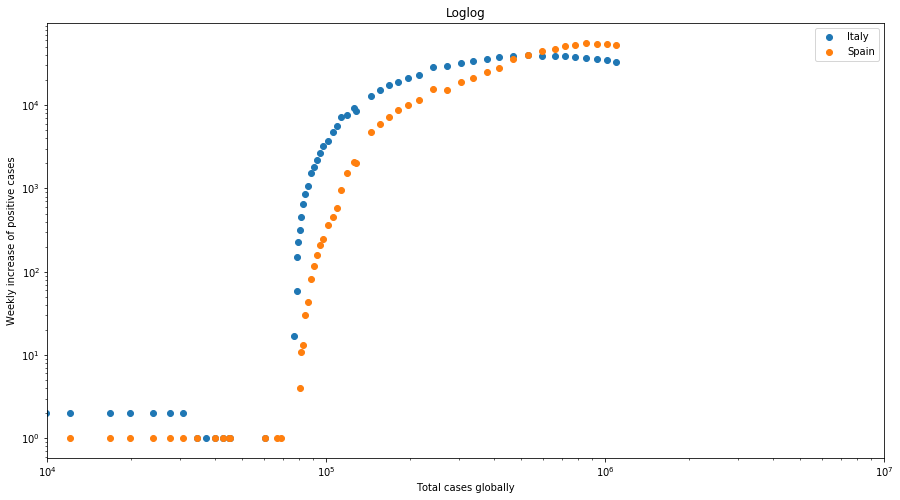

In [14]:
loglog_covid2(Confirmedweeklyrates, ['Italy', 'Spain'])

interactive(children=(SelectMultiple(description='countries', index=(0, 1), options=('Italy', 'Spain', 'USA'),…

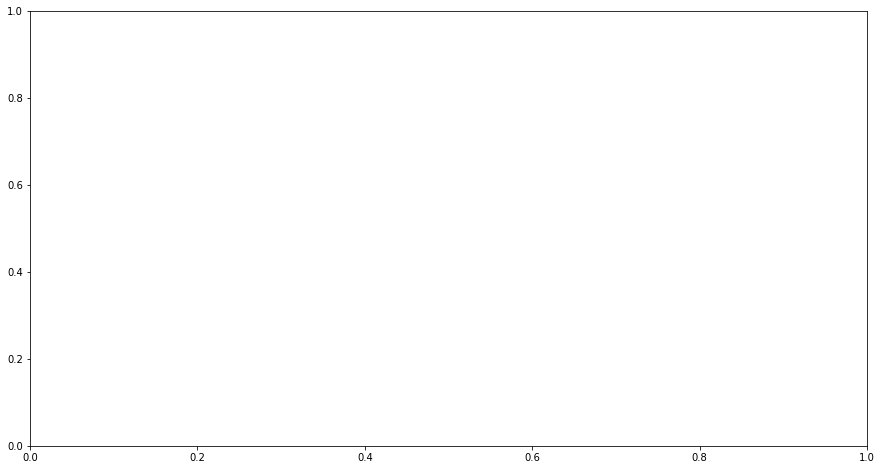

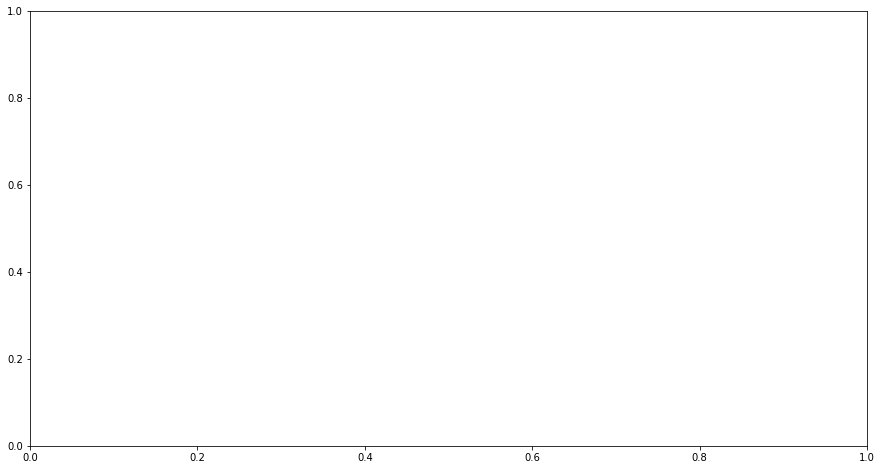

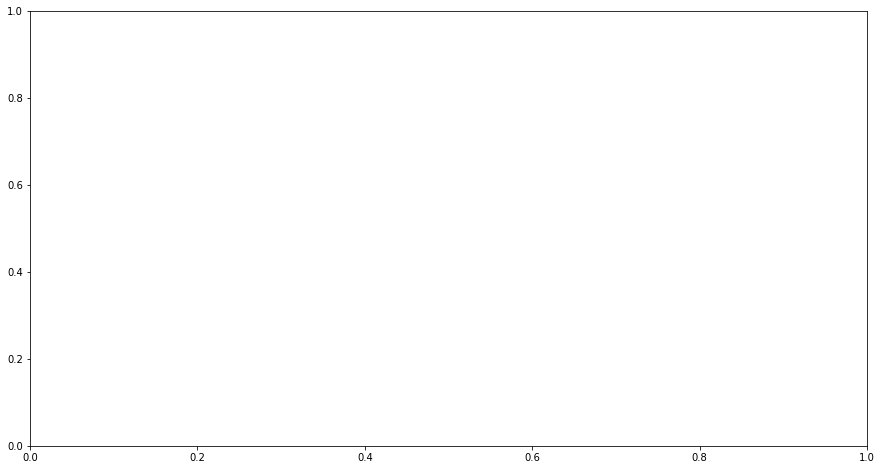

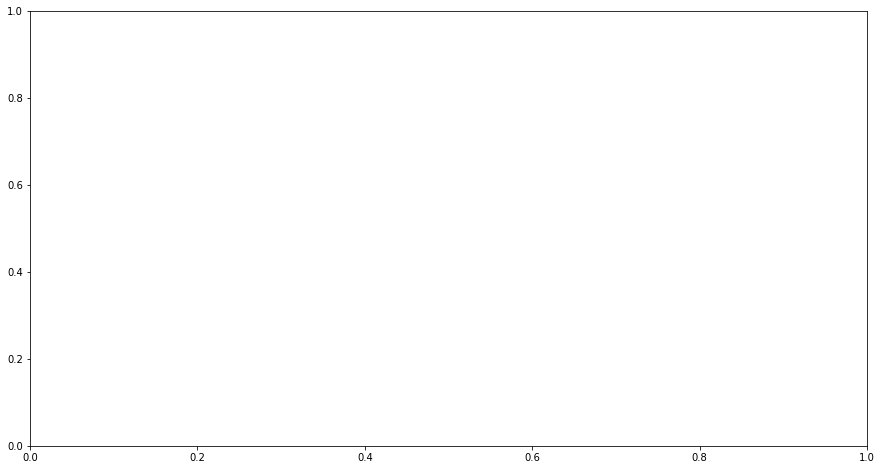

In [17]:
interact(loglog_covid2,
         Confirmedweeklyrates = fixed(Confirmedweeklyrates),
         countries = SelectMultiple(options=['Italy', 'Spain', 'USA'], value=['Italy', 'Spain']),
#                                     description='Select countries (Ctrl+ for multi-selection)', 
#                                     style = {'description_width': 'initial'},
#                                     layout=Layout(width='50%', height='200px')),
         );